In [193]:
# Classic imports
import random
import os

from data_processing import csv_data_processing
from pandas.plotting import scatter_matrix
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Parameters for algorithm
n_iter = 10             # iterations for algorithm to stop (additional stop variable)
k = 4                   # cluster number
standard = True         # standard scaling of data

In [194]:
# Data Processing with dedicated class (simple load with changing text/nonnumerical values to classes)
cdp = csv_data_processing()
database = cdp.process_data('clustering.csv')

In [195]:
nan_idx=[]
for iter, row in enumerate(database.values):
    for val in row:
        if pd.isnull(val) is True:
            nan_idx.append(iter)

database = database.drop(index=nan_idx, axis=1)

In [196]:
# Standard scaling of data
if standard is True:
    data=[]
    for column in database:
        col=[]
        for iter, item in enumerate(database[column]):
            col.append((item-np.mean(database[column]))/np.std(database[column]))
        data.append(col)

    database = pd.DataFrame(np.transpose(data), columns=database.columns)
    print(database)

      Loan_ID    Gender   Married  Dependents  Education  Self_Employed  \
0   -1.720787 -0.507093 -0.815392   -1.540884  -0.587348      -0.316228   
1   -1.711715 -0.507093 -0.815392   -0.222572  -0.587348       3.162278   
2   -1.702642 -0.507093 -0.815392   -0.222572   1.702567      -0.316228   
3   -1.693570 -0.507093  1.226403   -0.222572  -0.587348      -0.316228   
4   -1.684498 -0.507093 -0.815392   -0.222572   1.702567      -0.316228   
..        ...       ...       ...         ...        ...            ...   
303  1.690330 -0.507093 -0.815392    2.414051  -0.587348      -0.316228   
304  1.699402 -0.507093 -0.815392   -0.222572  -0.587348      -0.316228   
305  1.708475  1.972027  1.226403   -0.222572  -0.587348      -0.316228   
306  1.717547 -0.507093 -0.815392    2.414051  -0.587348      -0.316228   
307  1.726619  1.972027  1.226403   -0.222572  -0.587348       3.162278   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.673893      

In [197]:
# This is a place for processing database (in this we work on three features)
database_drop = database.drop(columns='Loan_ID').astype(float)
database = database[['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', "CoapplicantIncome", "Gender"]].copy()

# Deleting and storing the features names
if os.path.isdir(os.path.join(os.getcwd(), Path('exp_data'))) is False: os.mkdir('exp_data')

features = database.columns

# Saving them to txt and removing columns headers
with open('exp_data/features.txt', 'w') as f:
    for index, feats in enumerate(features): f.write(str(index) + ": " + str(feats) + "\n")

database = database.set_axis(list(range(0,len(features),1)), axis='columns')

print("Processed database:")
print(database)


Processed database:
            0         1         2         3         4
0    0.673893  0.796898  0.276189  0.091211 -0.507093
1   -0.410365 -1.316653  0.276189 -0.507947 -0.507093
2   -0.695985  0.524182  0.276189  0.428932 -0.507093
3    1.644452  1.240062  0.276189 -0.507947 -0.507093
4   -0.867220 -0.328056  0.276189  0.094389 -0.507093
..        ...       ...       ...       ...       ...
303  1.441025  0.796898  0.276189 -0.507947 -0.507093
304 -0.251459  0.115108  0.276189  0.266826 -0.507093
305 -0.478859 -1.146205  0.276189 -0.507947  1.972027
306  0.347177 -2.202981 -2.365620 -0.507947 -0.507093
307  0.673893  0.967346  0.276189 -0.507947  1.972027

[308 rows x 5 columns]


0: ApplicantIncome
1: LoanAmount
2: Loan_Amount_Term
3: CoapplicantIncome
4: Gender



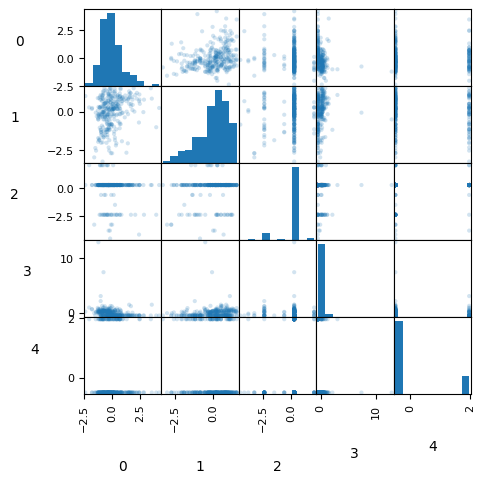

In [198]:
# Desciribing features with scatter matrix
with open('exp_data/features.txt', 'r') as f:
    print(f.read())

fig_scatter = scatter_matrix(database, alpha=0.2, figsize=(5,5), diagonal='hist')
for ax in fig_scatter.ravel():
    ax.set_xlabel(ax.get_xlabel(), labelpad=20)
    ax.set_ylabel(ax.get_ylabel(), rotation=0, ha='right', labelpad=20)

In [199]:
# Picking random points for start of clustering
centroids = []
inertia_iter = []
for centers in range (0, k): centroids.append(database.loc[random.randint(0, database.shape[0])])

print(centroids)

[0    1.644452
1    1.240062
2    0.276189
3   -0.507947
4   -0.507093
Name: 3, dtype: float64, 0    0.691017
1    1.205973
2   -2.365620
3    0.622427
4    1.972027
Name: 275, dtype: float64, 0    0.183477
1   -1.453011
2    0.276189
3   -0.507947
4    1.972027
Name: 210, dtype: float64, 0   -0.367899
1    0.217376
2   -2.365620
3    0.281527
4   -0.507093
Name: 187, dtype: float64]


In [210]:
# Calculating distance from centroids
for iter in range(0, n_iter):
    distance = []
    for centers in centroids:
        sum = 0
        for idx, cordinate in enumerate(centers): sum += (database[idx] - cordinate)**2
        distance.append(np.sqrt(sum))

    distance = pd.DataFrame(np.transpose(distance))

    # Clustering data
    labels = []
    for row in distance.iloc:
        labels.append(row[row==np.min(row)].index.values[0])
        
    distance['labels'] = labels
    del(labels)

    clusters=[]
    for label in range(0, k):
        clusters.append(database[distance["labels"]==label])

    if database.shape[1] == 2:
        fig_cluster = plt.figure()
        ax_cluster = fig_cluster.add_subplot()

        for centers in centroids: ax_cluster.scatter(centers[0], centers[1], marker='x', c='black', alpha=0.8)
        for group in clusters: ax_cluster.scatter(group[0], group[1], marker='o', alpha=0.5)


    if database.shape[1] == 3:
        fig_cluster = plt.figure()
        ax_cluster = fig_cluster.add_subplot(projection='3d')

        for centers in centroids: ax_cluster.scatter(centers[0], centers[1], centers[2], marker='x', c='black', alpha=0.8)
        for group in clusters: ax_cluster.scatter(group[0], group[1], group[2], marker='o', alpha=0.5)

    centroids=[]
    for center in range(0, k): centroids.append(np.mean(database[distance['labels']==center], axis=0))

    inertia = 0
    for label in range(0, k):
        inertia += np.sum(distance[distance['labels']==label][label])
    inertia_iter.append(inertia)

Index([  0,   2,   3,   8,  10,  11,  13,  14,  17,  18,
       ...
       277, 279, 284, 285, 287, 290, 292, 296, 302, 303],
      dtype='int64', length=123)
Index([  0,   2,   3,   8,  10,  11,  13,  14,  17,  18,
       ...
       277, 279, 284, 285, 287, 290, 292, 296, 302, 303],
      dtype='int64', length=123)
Index([  0,   2,   3,   8,  10,  11,  13,  14,  17,  18,
       ...
       277, 279, 284, 285, 287, 290, 292, 296, 302, 303],
      dtype='int64', length=123)
Index([  0,   2,   3,   8,  10,  11,  13,  14,  17,  18,
       ...
       277, 279, 284, 285, 287, 290, 292, 296, 302, 303],
      dtype='int64', length=123)
Index([  0,   2,   3,   8,  10,  11,  13,  14,  17,  18,
       ...
       277, 279, 284, 285, 287, 290, 292, 296, 302, 303],
      dtype='int64', length=123)
Index([  0,   2,   3,   8,  10,  11,  13,  14,  17,  18,
       ...
       277, 279, 284, 285, 287, 290, 292, 296, 302, 303],
      dtype='int64', length=123)
Index([  0,   2,   3,   8,  10,  11,  13,  14,

[            0         1
0   -0.087600 -0.311570
2   -0.684859 -0.829984
3    0.521388 -0.045675
8    0.337812 -0.001308
10   0.304455 -0.211708
..        ...       ...
290  0.585356 -0.129730
292 -0.608291 -0.416094
296 -0.606896 -1.347430
302  0.137482 -0.002165
303  0.490593  0.168387

[123 rows x 2 columns],             0         1
9    1.672785  0.311651
19   1.207859 -1.372589
26   0.603780 -1.288568
27   1.094849 -1.331715
28   0.905771 -0.897846
..        ...       ...
288  1.598927  1.542515
295  1.699313  1.152710
298  1.401487  0.023798
305  1.555425  0.235289
307  1.759021 -0.700306

[61 rows x 2 columns],             0         1
1    0.069909  0.777484
4   -0.485987 -0.247714
5   -0.055241  0.690010
6   -0.933881 -0.959797
12  -0.570537 -0.693425
..        ...       ...
289 -0.454629 -0.239222
293 -0.794527 -0.767103
297 -0.517443 -0.473734
299 -0.088149 -0.261394
304 -0.424867 -0.304031

[88 rows x 2 columns],             0         1
7   -1.993331  2.996399
39  -1.729071 

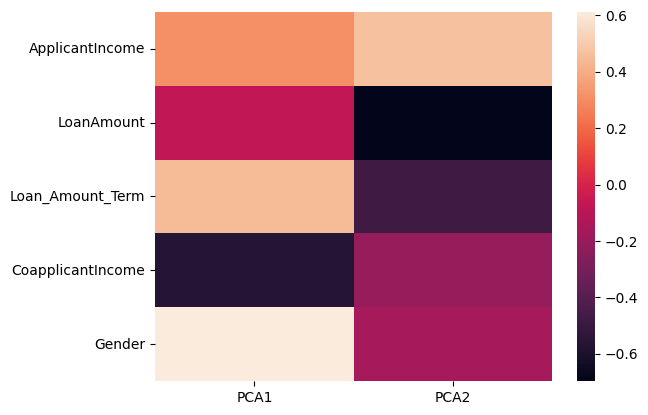

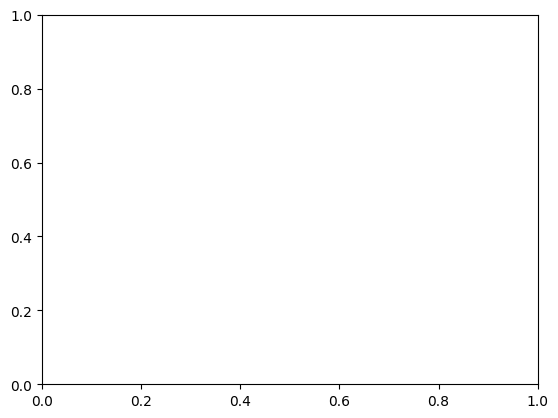

In [217]:
covar = database.cov()

eigenvalues, eigenvectors = np.linalg.eig(covar)

idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[idx]

explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)

n_components = np.argmax(explained_var >= 0.50) + 1

pca_vectors = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(pca_vectors, index=features, columns=['PCA1', 'PCA2'])

plt.figure()
sns.heatmap(pca_component)

covar_pca = pd.DataFrame(np.dot(database, pca_component))

covar.rename({'PC1': 'PCA1', 'PC2': 'PCA2'}, axis=1, inplace=True)

fig_pca = plt.figure()
ax_pca= fig_pca.add_subplot()

clusters_pca=[]
for label in range(0, k):
    clusters_pca.append(covar_pca[distance["labels"]==label])

print(clusters_pca)

# Add centroids to PCA transform?
fig_pca=plt.figure()
ax_pca=fig_pca.add_subplot()
for group in clusters_pca: ax_pca.scatter(group[0], group[1], marker='o', alpha=0.5)

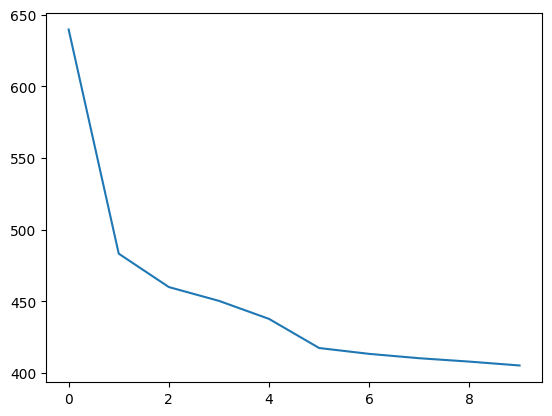

In [202]:
fig_inertia=plt.figure()
ax_inertia=fig_inertia.add_subplot()
ax_inertia.plot(inertia_iter)